**This dataset includes all major universities globally**

Each university is ranked based on a variety of different factors that include alumni employment, quality of education, quality of staff, publications, influence, citations, broad impact and an overall score by each year. This anlaysis spans from 2019-2022. 


The dataset can be found [here](https://cwur.org/2012.php). Click on the "World University Rankings" to see the rankings for each individual year starting in 2012. Each year has a differing number of rankings and a differing number of columns categorizing each institution. Each dataset was imported into microsoft excel where the data was cleaned in power query. The numbers shown in each column represents a rank from 1 to 2000, where a lower number is a higher rank unless referring to the score column where a higher number indicates a higher overall rank.
 
Questions to be answered include:

1. How do the rankings of each university compare to each other ( specifically how do the top universities change there overall rank and categorical rank over time).
2. How does my Alma Mater (McMaster University) compare to other major universities in Canada and across the globe. 
3. How do American universities on average fair in terms of their overall score relative to other developed nations (United Kingdom, Canada, Germany). How has this average changed over time.
4. How do countries outside of North America rank in terms of average score based on each category displayed in the data?




Importing the appropriate modules 

In [93]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os 


In [94]:
os.getcwd()

'C:\\Users\\grant\\Desktop\\Coding\\Projects\\data\\course_project'

Changing the current working directory

In [95]:
os.chdir('C:/Users/grant/Desktop/Coding/Projects/data/course_project')

In [96]:
os.getcwd()

'C:\\Users\\grant\\Desktop\\Coding\\Projects\\data\\course_project'

Reading the files and saving them under appropriate variable names

In [97]:
university_2019 = pd.read_csv('school_2019.csv', encoding='cp1252')
university_2020 = pd.read_csv('school_2020.csv', encoding='cp1252')
university_2021 = pd.read_csv('school_2021.csv', encoding='cp1252')
university_2022 = pd.read_csv('school_2022.csv', encoding='cp1252')


Merging the data sets fromn 2019-2022 years. 

In [98]:
merged_df = pd.concat([university_2019, university_2020, university_2021, university_2022], axis=0)
merged_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,1.0,10.0,2.0,5.0,2019,96.7
2,3,Stanford University,USA,3,9.0,3.0,3.0,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,4.0,19.0,5.0,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,10.0,24.0,10.0,4.0,2019,93.3
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Bharathidasan University,India,66,NaN,NaN,NaN,1921.0,2022,65.8
1996,1997,Federal University of Maranhão,Brazil,56,NaN,NaN,NaN,1923.0,2022,65.7
1997,1998,Jiangxi University of Finance and Economics,China,302,NaN,797.0,NaN,1948.0,2022,65.7
1998,1999,University of Tarapacá,Chile,16,NaN,NaN,NaN,1925.0,2022,65.7


In [99]:
# This establishes that 3 of the columns lack a large amount of data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            8000 non-null   int64  
 1   institution           8000 non-null   object 
 2   country               8000 non-null   object 
 3   national_rank         8000 non-null   int64  
 4   quality_of_education  1709 non-null   float64
 5   alumni_employment     3878 non-null   float64
 6   quality_of_faculty    1052 non-null   float64
 7   research_performance  7748 non-null   float64
 8   year                  8000 non-null   int64  
 9   score                 8000 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 687.5+ KB


In [101]:
merged_df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
count,8000.000000,8000.000000,1709.000000,3878.000000,1052.00000,7748.000000,8000.000000,8000.000000
mean,1000.500000,67.638750,263.059099,709.919030,133.10076,969.178240,2020.500000,71.611225
std,577.386285,83.566911,160.239124,466.104598,77.46616,559.513764,1.118104,5.073271
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2019.000000,65.700000
25%,500.750000,10.000000,115.000000,290.000000,66.00000,485.000000,2019.750000,67.700000
50%,1000.500000,33.000000,268.000000,680.000000,131.50000,969.000000,2020.500000,70.300000
75%,1500.250000,87.000000,407.000000,1102.750000,199.00000,1453.000000,2021.250000,74.100000
max,2000.000000,358.000000,536.000000,1653.000000,274.00000,2000.000000,2022.000000,100.000000


In [102]:
merged_df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'research_performance', 'year', 'score'],
      dtype='object')

Assessing the number of rows and columns in the data set. ( 8000 rows x 7 columns)

In [103]:
merged_df.shape

(8000, 10)

Creating a copy of the data set.

In [104]:
merged_df_copy = merged_df.copy()

Looking for the total number of unique entries in the institution column


In [105]:
merged_df['country'].nunique()

104

**Analyzing Data**

Sorting the universities by world rank from highest to lowest.

In [106]:
merged_df.sort_values('world_rank', ascending= True).head(20)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,2019,100.0
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,2022,100.0
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,2021,100.0
0,1,Harvard University,USA,1,3.0,1.0,1.0,1.0,2020,100.0
1,2,Massachusetts Institute of Technology,USA,2,4.0,12.0,2.0,7.0,2022,96.7
1,2,Massachusetts Institute of Technology,USA,2,4.0,11.0,2.0,7.0,2020,96.7
1,2,Massachusetts Institute of Technology,USA,2,4.0,12.0,2.0,8.0,2021,96.7
1,2,Massachusetts Institute of Technology,USA,2,1.0,10.0,2.0,5.0,2019,96.7
2,3,Stanford University,USA,3,9.0,3.0,3.0,2.0,2019,95.2
2,3,Stanford University,USA,3,10.0,4.0,3.0,2.0,2021,95.1


Creating a dataframe with the top 10 universities from 2019 to 2022

In [107]:
top_10 = merged_df[merged_df.world_rank <= 10]
top_10

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,1.0,10.0,2.0,5.0,2019,96.7
2,3,Stanford University,USA,3,9.0,3.0,3.0,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,4.0,19.0,5.0,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,10.0,24.0,10.0,4.0,2019,93.3
5,6,Columbia University,USA,4,13.0,12.0,8.0,12.0,2019,92.6
6,7,Princeton University,USA,5,6.0,14.0,6.0,54.0,2019,92.0
7,8,"University of California, Berkeley",USA,6,5.0,48.0,9.0,6.0,2019,91.6
8,9,University of Pennsylvania,USA,7,15.0,8.0,30.0,14.0,2019,91.1
9,10,University of Chicago,USA,8,11.0,18.0,19.0,16.0,2019,90.7


In [108]:
# This establishes 2 countries with top level universities globally by world rank (UK and USA)
top_10['country'].nunique()

2

Looking at all institutions with a score greater than 90.

In [109]:
score_top = merged_df[ merged_df.score > 90]
score_top

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,1.0,10.0,2.0,5.0,2019,96.7
2,3,Stanford University,USA,3,9.0,3.0,3.0,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,4.0,19.0,5.0,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,10.0,24.0,10.0,4.0,2019,93.3
5,6,Columbia University,USA,4,13.0,12.0,8.0,12.0,2019,92.6
6,7,Princeton University,USA,5,6.0,14.0,6.0,54.0,2019,92.0
7,8,"University of California, Berkeley",USA,6,5.0,48.0,9.0,6.0,2019,91.6
8,9,University of Pennsylvania,USA,7,15.0,8.0,30.0,14.0,2019,91.1
9,10,University of Chicago,USA,8,11.0,18.0,19.0,16.0,2019,90.7


Seeing where McMaster University ranks by each year ( My Alma Mater)

In [110]:
mcmaster_overall = merged_df[merged_df.institution == 'McMaster University']
mcmaster_overall

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
126,127,McMaster University,Canada,6,153.0,673.0,153.0,108.0,2019,80.7
159,160,McMaster University,Canada,6,418.0,743.0,217.0,127.0,2020,79.7
163,164,McMaster University,Canada,6,419.0,745.0,223.0,133.0,2021,79.6
171,172,McMaster University,Canada,6,429.0,764.0,228.0,138.0,2022,79.4


In [111]:
mcmaster_metrics = mcmaster_overall[['world_rank', 'national_rank', 'score']]
mcmaster_metrics

,world_rank,national_rank,score
126,127,6,80.7
159,160,6,79.7
163,164,6,79.6
171,172,6,79.4


In [112]:
mcmaster_mean = mcmaster_metrics.mean()
mcmaster_mean

world_rank       155.75
national_rank      6.00
score             79.85
dtype: float64

Compare average score of Mcmaster University from 2019-2022 and compare to other top universities in Canada over the same period of time. 

In [113]:
universites_canada = merged_df[merged_df.country == "Canada"]
universites_canada

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
23,24,University of Toronto,Canada,1,236.0,162.0,24.0,3.0,2019,87.5
29,30,McGill University,Canada,2,27.0,91.0,71.0,41.0,2019,86.7
51,52,University of British Columbia,Canada,3,158.0,662.0,99.0,29.0,2019,84.5
88,89,University of Alberta,Canada,4,404.0,387.0,110.0,75.0,2019,82.3
104,105,University of Montreal,Canada,5,397.0,431.0,116.0,92.0,2019,81.6
...,...,...,...,...,...,...,...,...,...,...
1703,1704,University of Québec at Trois-Rivières,Canada,38,NaN,NaN,NaN,1631.0,2022,66.8
1799,1800,Saint Mary's University,Canada,39,NaN,1227.0,NaN,1736.0,2022,66.5
1870,1871,University of Winnipeg,Canada,40,NaN,NaN,NaN,1797.0,2022,66.2
1964,1965,University of Québec at Chicoutimi,Canada,41,NaN,NaN,NaN,1886.0,2022,65.9


Looking at the top 10 universities in Canada from 2019-2022


In [114]:
canada_top_10 = universites_canada[universites_canada.national_rank <= 10]
canada_top_10

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
23,24,University of Toronto,Canada,1,236.0,162.0,24.0,3.0,2019,87.5
29,30,McGill University,Canada,2,27.0,91.0,71.0,41.0,2019,86.7
51,52,University of British Columbia,Canada,3,158.0,662.0,99.0,29.0,2019,84.5
88,89,University of Alberta,Canada,4,404.0,387.0,110.0,75.0,2019,82.3
104,105,University of Montreal,Canada,5,397.0,431.0,116.0,92.0,2019,81.6
126,127,McMaster University,Canada,6,153.0,673.0,153.0,108.0,2019,80.7
178,179,University of Waterloo,Canada,7,NaN,215.0,138.0,200.0,2019,79.2
183,184,University of Calgary,Canada,8,NaN,218.0,NaN,144.0,2019,79.1
185,186,University of Ottawa,Canada,9,NaN,423.0,NaN,131.0,2019,79.0
186,187,Western University,Canada,10,NaN,93.0,NaN,184.0,2019,79.0


Looking at the lowest ranked universities in Canada


In [115]:
universites_canada.sort_values('national_rank', ascending= False).head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
1957,1958,Royal Military College of Canada,Canada,44,NaN,1185.0,NaN,1883.0,2020,66.0
1940,1941,Acadia University,Canada,43,185.0,466.0,NaN,NaN,2020,66.0
1909,1910,Acadia University,Canada,43,426.0,458.0,NaN,1968.0,2019,66.1
1842,1843,University of Québec at Chicoutimi,Canada,42,NaN,NaN,NaN,1782.0,2019,66.4
1945,1946,University of Québec at Chicoutimi,Canada,42,NaN,NaN,NaN,1871.0,2021,65.9
1926,1927,University of Québec at Chicoutimi,Canada,42,NaN,NaN,NaN,1848.0,2020,66.1
1971,1972,University of Northern British Columbia,Canada,42,NaN,NaN,NaN,1897.0,2022,65.8
1844,1845,University of Northern British Columbia,Canada,41,NaN,NaN,NaN,1762.0,2020,66.4
1964,1965,University of Québec at Chicoutimi,Canada,41,NaN,NaN,NaN,1886.0,2022,65.9
1878,1879,University of Northern British Columbia,Canada,41,NaN,NaN,NaN,1802.0,2021,66.2


Setting the year column as the index in place.

In [116]:
canada_top_10.set_index('year', inplace=True)


Making Canadian university specific datasets 

In [117]:
canada_top_10.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,score
year,,,,,,,,,
2019,24,University of Toronto,Canada,1,236.0,162.0,24.0,3.0,87.5
2019,30,McGill University,Canada,2,27.0,91.0,71.0,41.0,86.7
2019,52,University of British Columbia,Canada,3,158.0,662.0,99.0,29.0,84.5
2019,89,University of Alberta,Canada,4,404.0,387.0,110.0,75.0,82.3
2019,105,University of Montreal,Canada,5,397.0,431.0,116.0,92.0,81.6
2019,127,McMaster University,Canada,6,153.0,673.0,153.0,108.0,80.7
2019,179,University of Waterloo,Canada,7,NaN,215.0,138.0,200.0,79.2
2019,184,University of Calgary,Canada,8,NaN,218.0,NaN,144.0,79.1
2019,186,University of Ottawa,Canada,9,NaN,423.0,NaN,131.0,79.0


In [118]:
mcmaster_year = canada_top_10[canada_top_10.institution == "McMaster University"]
montreal_year = canada_top_10[canada_top_10.institution == "University of Montreal"]
waterloo_year = canada_top_10[canada_top_10.institution == "University of Waterloo"]
toronto_year = canada_top_10[canada_top_10.institution == "University of Toronto"]
mcgill_year = canada_top_10[canada_top_10.institution == "Mcgill University"]
british_columbia_year = canada_top_10[canada_top_10.institution == "University of British Columbia"]
alberta_year = canada_top_10[canada_top_10.institution == "University of Alberta"]
calgary_year = canada_top_10[canada_top_10.institution == "University of Calgary"]
ottawa_year = canada_top_10[canada_top_10.institution == "University of Ottawa"]
western_year = canada_top_10[canada_top_10.institution == "Western University"]

In [119]:
sns.set_style('darkgrid')

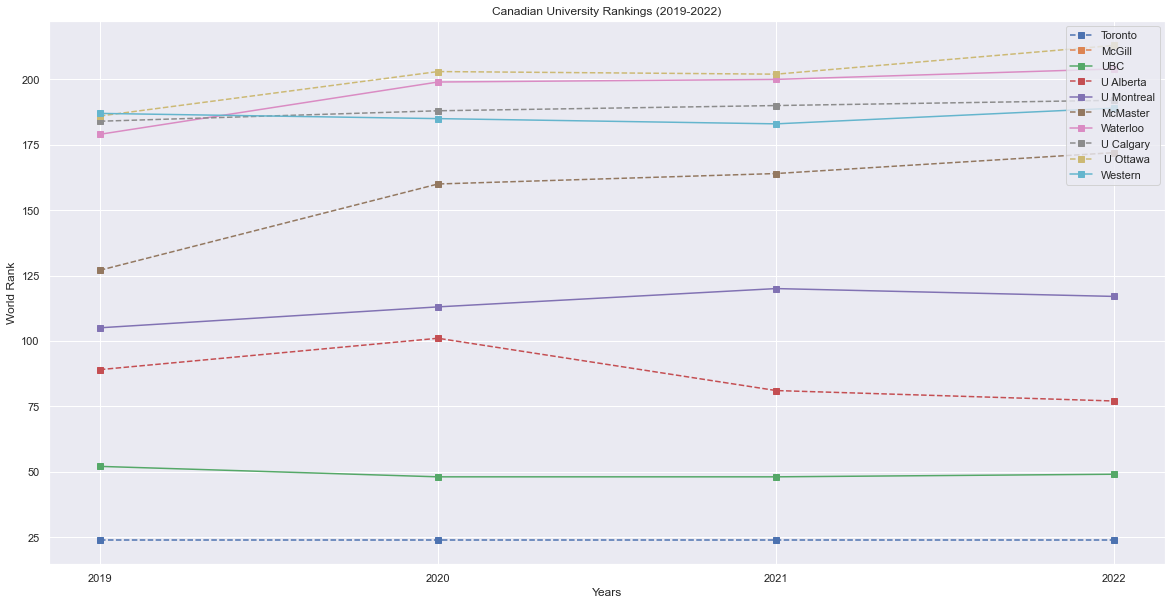

In [120]:
# Graphing Canadian Universities based on world rank
plt.figure(figsize=(20,10))

plt.plot(toronto_year.world_rank,marker = 's', ls='--')
plt.plot(mcgill_year.world_rank,marker = 's', ls='--')
plt.plot(british_columbia_year.world_rank,marker = 's', ls='-')
plt.plot(alberta_year.world_rank,marker = 's', ls='--')
plt.plot(montreal_year.world_rank,marker = 's', ls='-')
plt.plot(mcmaster_year.world_rank,marker = 's', ls='--')
plt.plot(waterloo_year.world_rank,marker = 's', ls='-')
plt.plot(calgary_year.world_rank,marker = 's', ls='--')
plt.plot(ottawa_year.world_rank,marker = 's', ls='--')
plt.plot(western_year.world_rank,marker = 's', ls='-')


plt.xlabel('Years')
plt.xticks(np.arange(2019,2023, step=1))
plt.ylabel('World Rank')

plt.title('Canadian University Rankings (2019-2022)')
plt.legend(['Toronto', 'McGill', 'UBC', 'U Alberta', 'U Montreal', 'McMaster', "Waterloo", 'U Calgary', ' U Ottawa', 'Western' ], loc='upper right');

Creating multiple graphs highlighting McMaster University rank over time by category.

(75.0, 81.0)

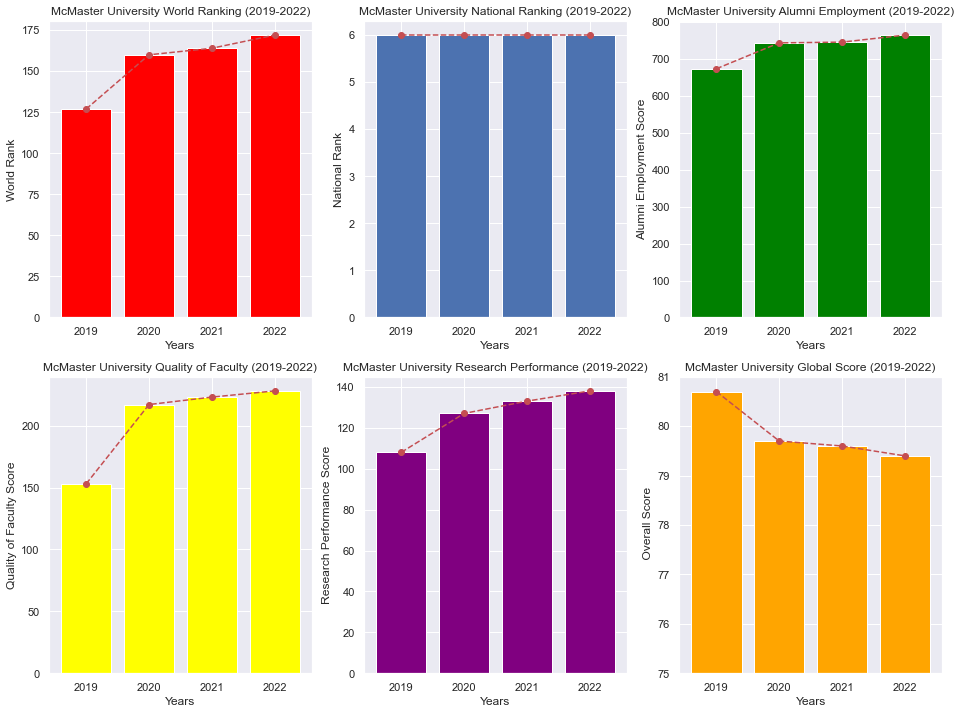

In [138]:
from turtle import color


fig, axes = plt.subplots(2, 3, figsize=(16, 12))

axes[0,0].bar(mcmaster_year.index,mcmaster_year.world_rank, color= 'red')
axes[0,0].plot(mcmaster_year.world_rank, 'o--r')
axes[0,0].set_xlabel('Years')
axes[0,0].set_xticks(np.arange(2019,2023, step=1))
axes[0,0].set_ylabel('World Rank')
axes[0,0].set_title('McMaster University World Ranking (2019-2022)')

axes[0,1].bar(mcmaster_year.index,mcmaster_year.national_rank)
axes[0,1].plot(mcmaster_year.national_rank, 'o--r')
axes[0,1].set_xlabel('Years')
axes[0,1].set_xticks(np.arange(2019,2023, step=1))
axes[0,1].set_ylabel('National Rank')
axes[0,1].set_title('McMaster University National Ranking (2019-2022)')


axes[0,2].bar(mcmaster_year.index,mcmaster_year.alumni_employment, color= 'green')
axes[0,2].plot(mcmaster_year.alumni_employment, 'o--r')
axes[0,2].set_xlabel('Years')
axes[0,2].set_xticks(np.arange(2019,2023, step=1))
axes[0,2].set_ylabel('Alumni Employment Score')
axes[0,2].set_title('McMaster University Alumni Employment (2019-2022)')


axes[1,0].bar(mcmaster_year.index,mcmaster_year.quality_of_faculty, color= 'yellow')
axes[1,0].plot(mcmaster_year.quality_of_faculty, 'o--r')
axes[1,0].set_xlabel('Years')
axes[1,0].set_xticks(np.arange(2019,2023, step=1))
axes[1,0].set_ylabel('Quality of Faculty Score')
axes[1,0].set_title('McMaster University Quality of Faculty (2019-2022)')


axes[1,1].bar(mcmaster_year.index,mcmaster_year.research_performance, color= 'purple')
axes[1,1].plot(mcmaster_year.research_performance, 'o--r')
axes[1,1].set_xlabel('Years')
axes[1,1].set_xticks(np.arange(2019,2023, step=1))
axes[1,1].set_ylabel('Research Performance Score')
axes[1,1].set_title('McMaster University Research Performance (2019-2022)')

axes[1,2].bar(mcmaster_year.index,mcmaster_year.score, color= 'orange')
axes[1,2].plot(mcmaster_year.score, 'o--r')
axes[1,2].set_xlabel('Years')
axes[1,2].set_xticks(np.arange(2019,2023, step=1))
axes[1,2].set_ylabel(' Overall Score')
axes[1,2].set_title('McMaster University Global Score (2019-2022)')
axes[1,2].set_ylim([75,81])

**Top Universities Globally**

In [122]:
sns.set(rc={'figure.figsize':(20,20)})

 Graphing the top universities globally by world_rank ( where lower number is a higher rank)

c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


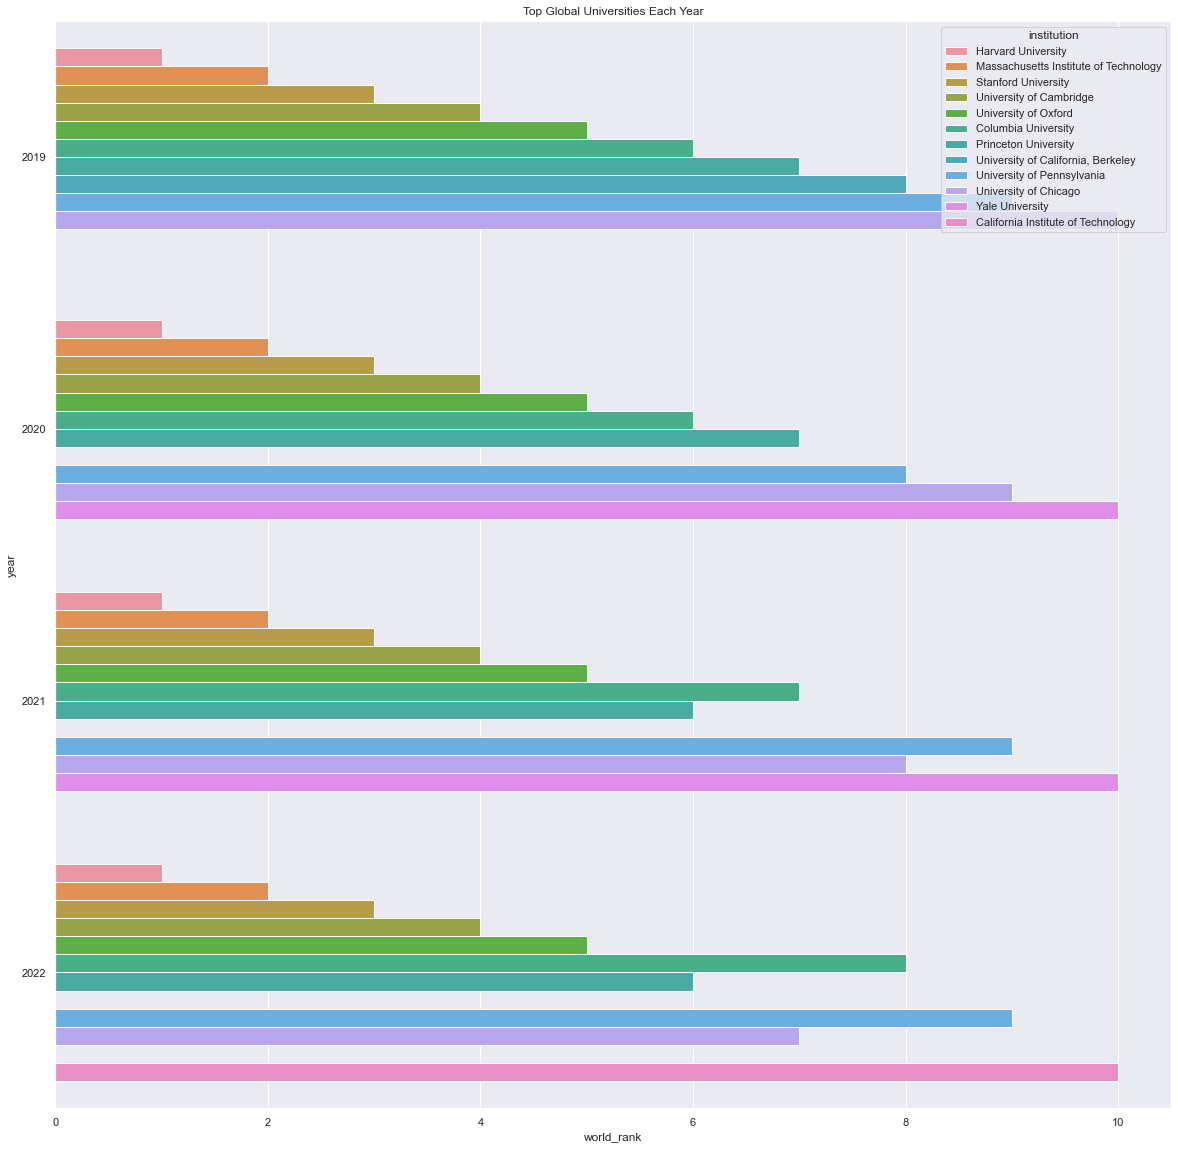

In [139]:
sns.barplot('world_rank','year',hue='institution', data=top_10, orient='h')
plt.title("Top Global Universities Each Year");


Grouping by countries to see the average overall score for institutions in the top 2000.

In [124]:
edu_mean = merged_df.groupby('country')[['quality_of_education']].mean().sort_values('quality_of_education', ascending=True).head(10)
edu_mean

,quality_of_education
country,
Switzerland,110.875000
Israel,127.125000
Bulgaria,182.500000
Russia,186.146341
USA,215.859967
Lebanon,228.000000
United Kingdom,241.534031
Denmark,242.166667
Sweden,246.343750


c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


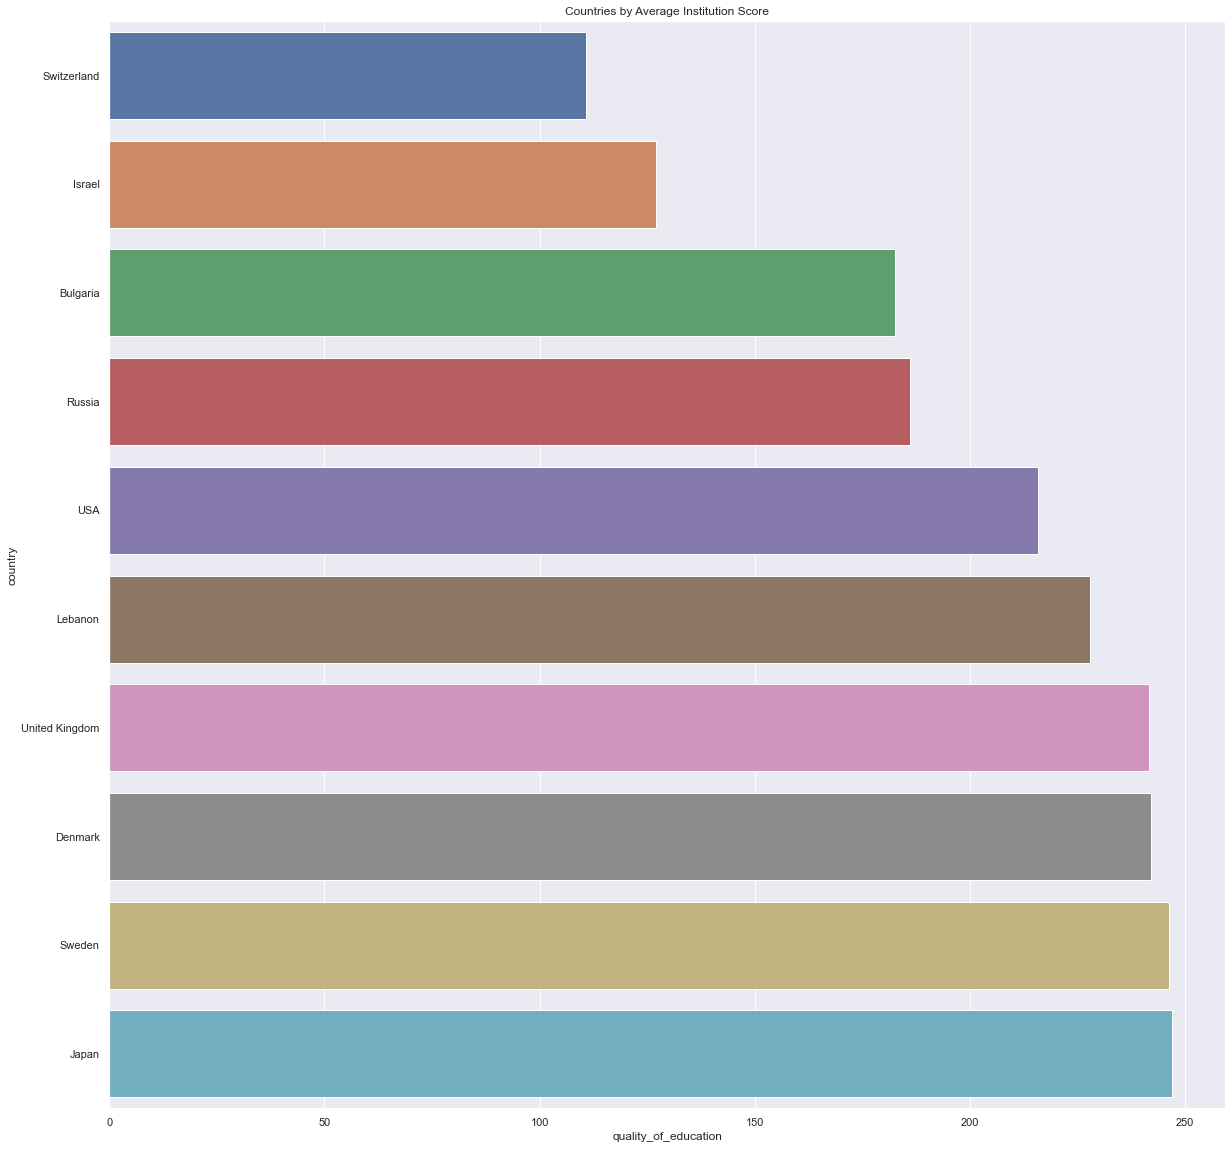

In [125]:
plt.title('Countries by Average Institution Score')
sns.barplot(edu_mean.quality_of_education, edu_mean.index, orient = 'h');

Graphing each country by alumni employment for each institution listed in the top 2000.

In [126]:
alumni_mean = merged_df.groupby('country')[['alumni_employment']].mean().sort_values('alumni_employment', ascending=True).head(10)
alumni_mean

,alumni_employment
country,
Lebanon,183.000000
Switzerland,380.625000
USA,491.841159
Philippines,497.714286
Macau,500.500000
Israel,522.916667
France,536.305556
Singapore,573.125000
Belgium,583.500000


c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


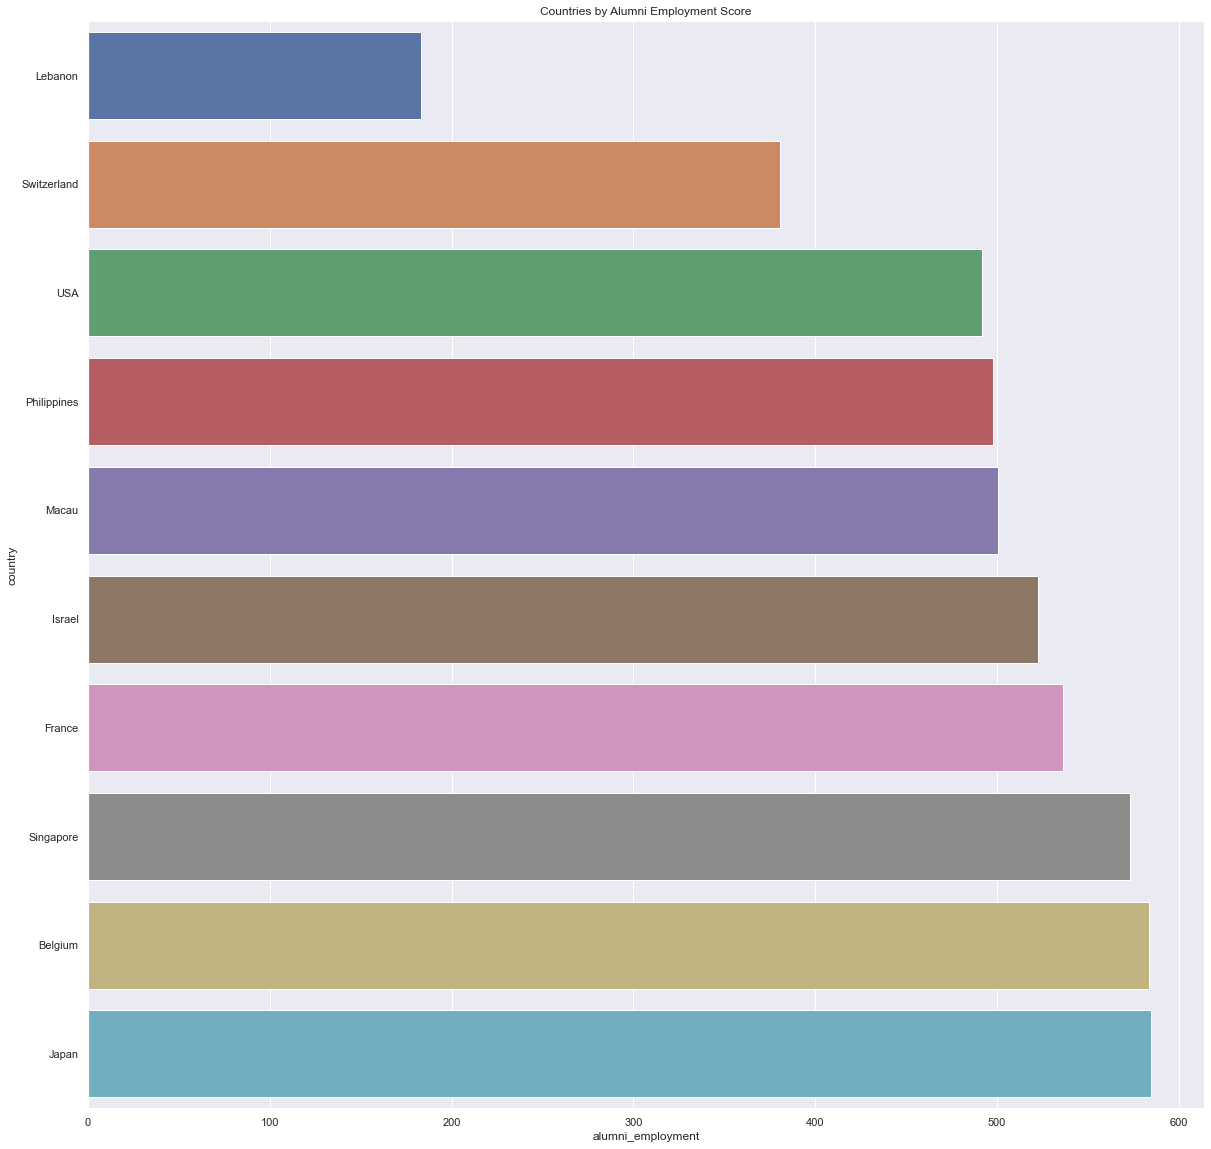

In [127]:
plt.title('Countries by Alumni Employment Score')
sns.barplot(alumni_mean.alumni_employment, alumni_mean.index, orient = 'h');

Graphing the highest overall score on average by country

In [128]:
score_avg_df = merged_df.groupby('country')[['score']].mean().sort_values('score', ascending= False).head(10)


In [129]:
score_avg_df

,score
country,
Switzerland,77.985417
Netherlands,77.881034
Denmark,76.378571
Israel,75.927778
Hong Kong,75.628571
Belgium,75.506977
Singapore,75.218750
Germany,74.503957
Sweden,74.033766


c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


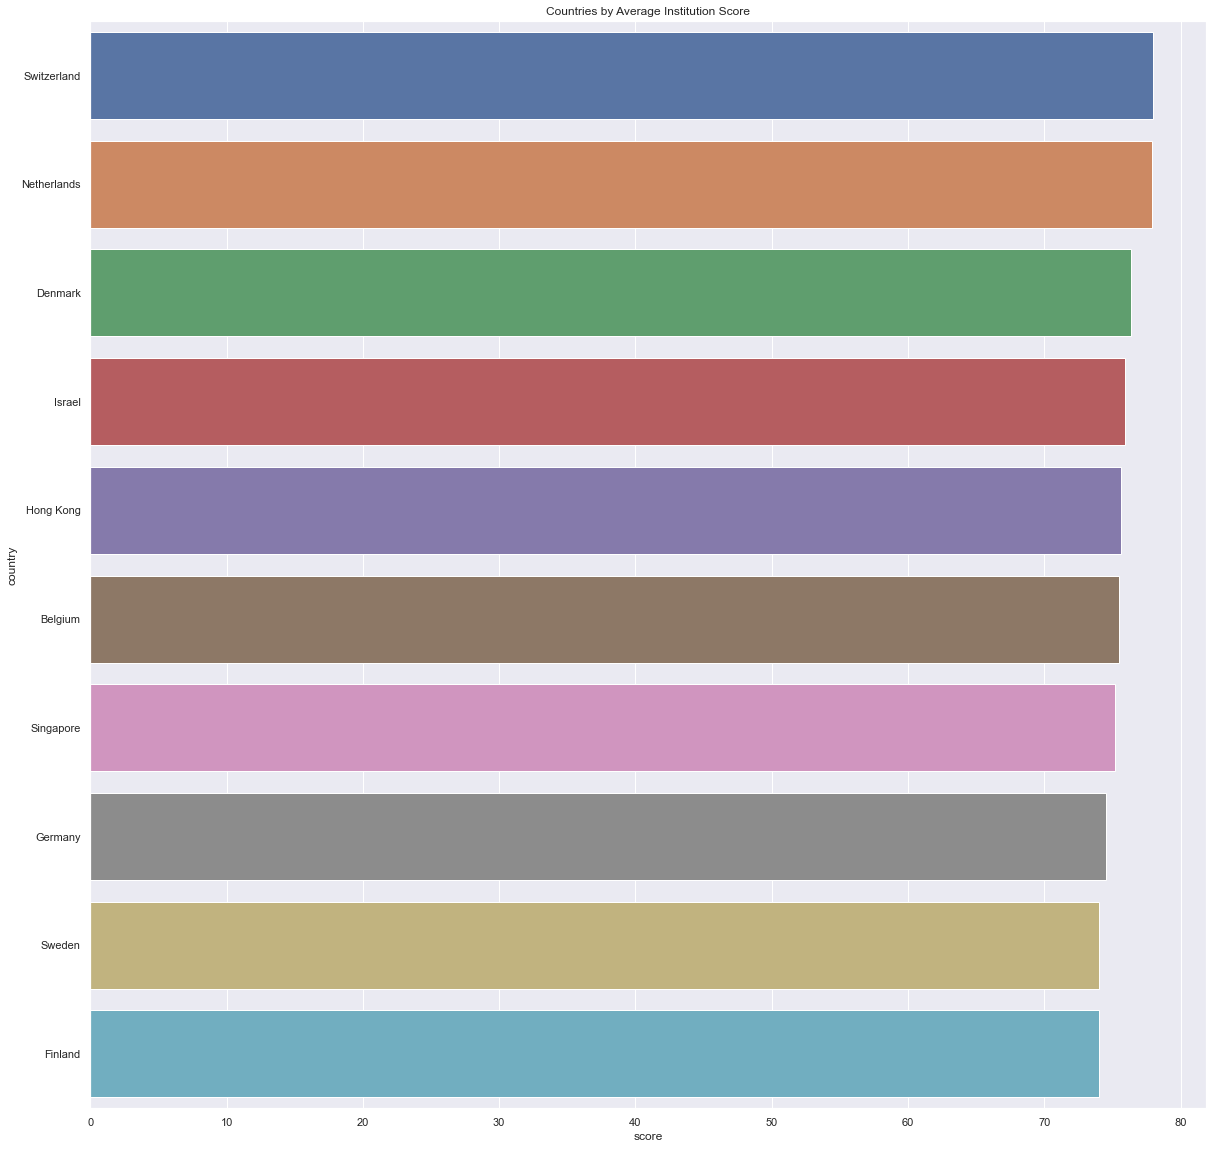

In [130]:
plt.title('Countries by Average Institution Score')
sns.barplot(score_avg_df.score, score_avg_df.index, orient = 'h');

Selecting for specific developed nations to compare to Canada in terms of score and rank on average 

In [131]:
top_countries = merged_df.loc[merged_df['country'].isin(['USA', 'United Kingdom', 'Canada', 'China', 'Germany'])]

In [132]:
top_countries

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,1.0,10.0,2.0,5.0,2019,96.7
2,3,Stanford University,USA,3,9.0,3.0,3.0,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,4.0,19.0,5.0,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,10.0,24.0,10.0,4.0,2019,93.3
...,...,...,...,...,...,...,...,...,...,...
1980,1981,Huaibei Normal University,China,299,NaN,NaN,NaN,1907.0,2022,65.8
1983,1984,Hebei University of Science and Technology,China,300,NaN,1035.0,NaN,1924.0,2022,65.8
1986,1987,Chengdu University of Traditional Chinese Medi...,China,301,NaN,NaN,NaN,1912.0,2022,65.8
1991,1992,University of North Florida,USA,335,NaN,NaN,NaN,1917.0,2022,65.8


Filtering based on total number of times each country appears in the list from 2019-2022

In [133]:
count_top_df = top_countries.groupby('country')[['score']].count()

Renaming the score column and creating a new column based on the number of high level institutions per million people. These populations are sourced from [worldometers.info](https://www.worldometers.info/world-population/population-by-country/)


In [134]:
# This establishes that the USA and China have a large number of highly ranked insititutions globally. 
count_top_df.rename(columns={'score':'count_score'}, inplace=True)
count_top_df['population'] = [37742154, 1439323776,84351923, 331002651, 67886011]
count_top_df['insitutions_per_million'] = count_top_df.count_score *1e6/ count_top_df.population
count_top_df

,count_score,population,insitutions_per_million
country,,,
Canada,171,37742154,4.530743
China,1095,1439323776,0.760774
Germany,278,84351923,3.295716
USA,1397,331002651,4.220510
United Kingdom,378,67886011,5.568157


Graphing the number of institutions that rank in the top 2000 from 2019-2022

c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


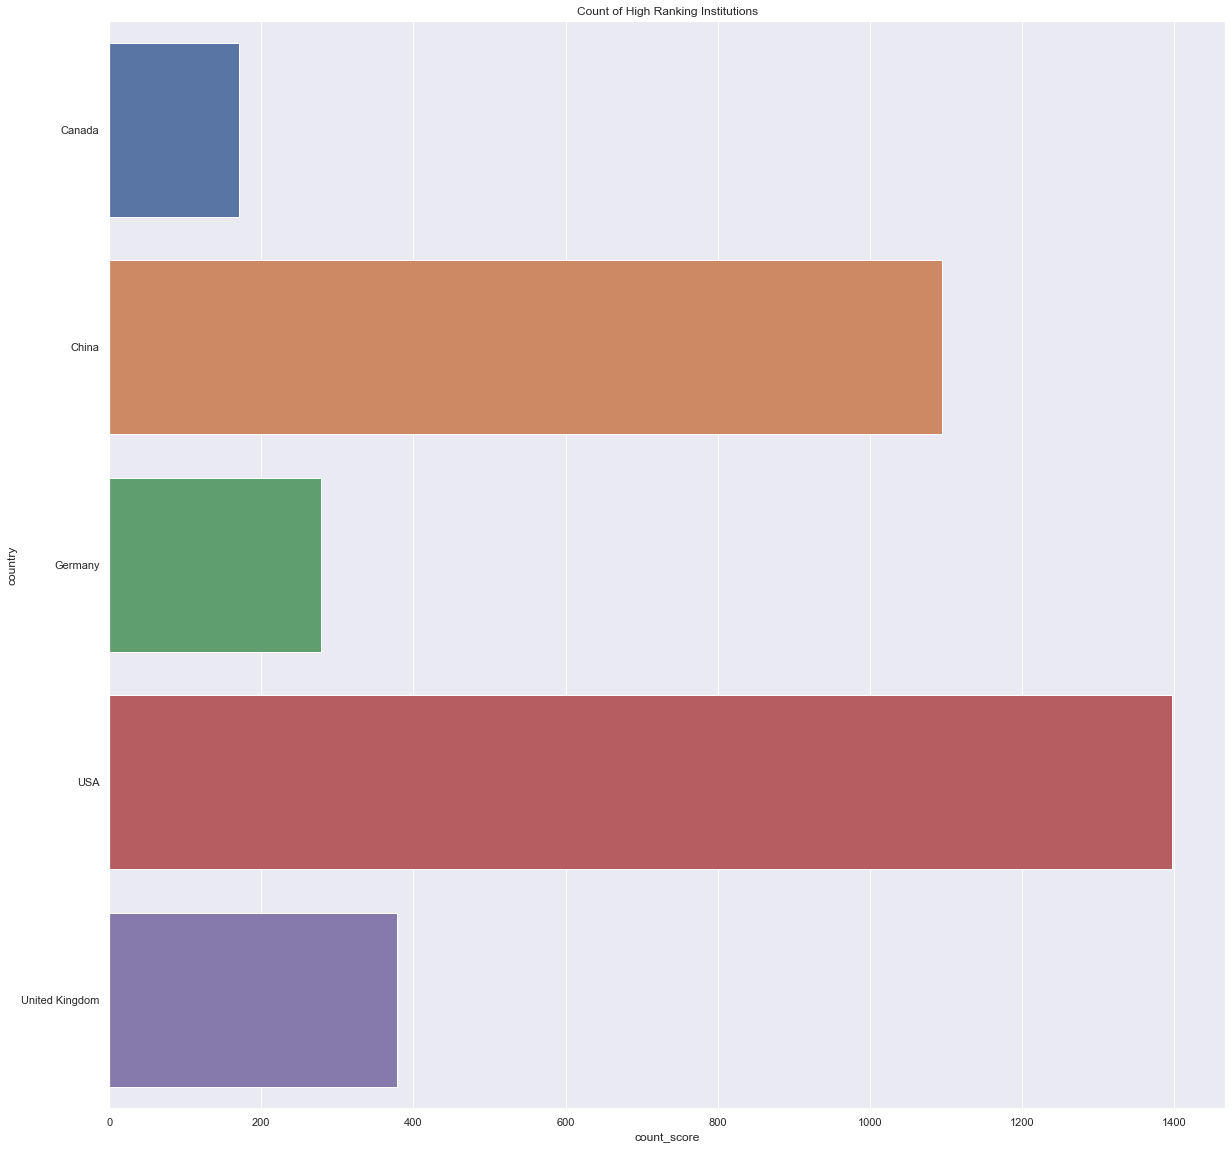

In [135]:
plt.title('Count of High Ranking Institutions')
sns.barplot(count_top_df.count_score, count_top_df.index, orient = 'h');

Graphing the number of high ranking institutions on a per million citizen basis.

c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


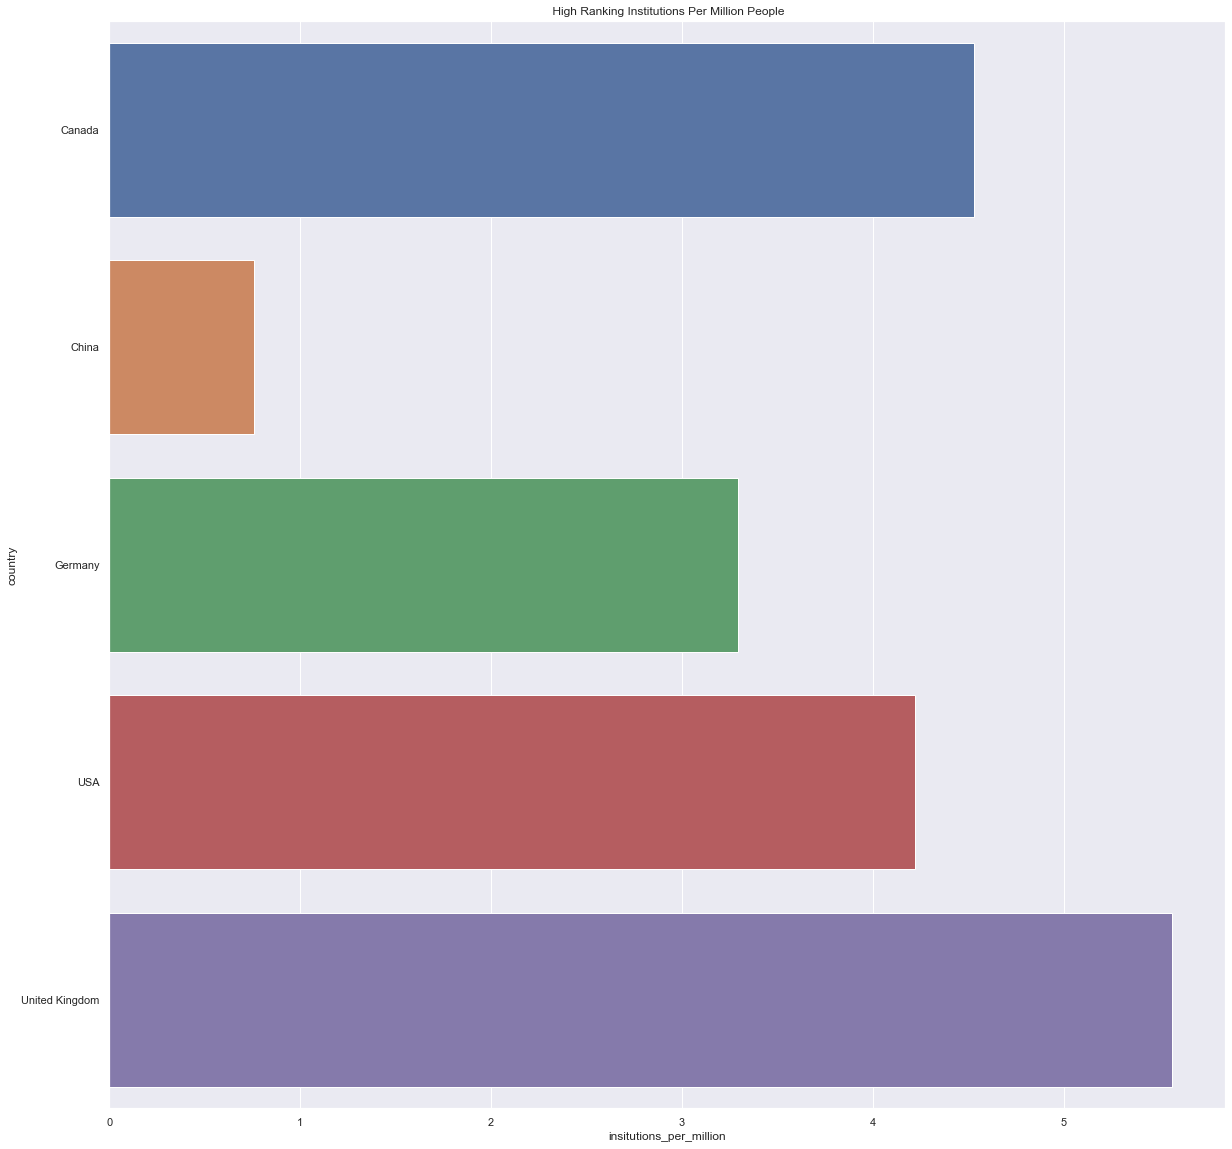

In [136]:
plt.title(' High Ranking Institutions Per Million People')
sns.barplot(count_top_df.insitutions_per_million, count_top_df.index, orient = 'h');

**Inferences**

 How do the rankings of each university compare to each other ( specifically how do the top universities change there overall rank and categorical rank over time)?

- The top universities have minimal change over time in terms of the overall score and rank along with other attributes that describe the universities. 

 How does my Alma Mater (McMaster University) compare to other major universities in Canada and across the globe?

- My Alma Mater consistently ranks as 6th nationaly. The overall global rank and score has decreased over time as all categories measured in the study show a slow reduction in rank. This change in global rank has decreased faster than other members of the top ten universities in Canada. 


 How do American universities on average fair in terms of their overall score relative to other developed nations (United Kingdom, Canada, Germany). How has this average changed over time?

- American Universities are ranked high when referring to the most elite insitutions globally. The USA also has a large number of insitutions that rank in the top 2000 on both absolute terms and relative to population size.

 How do countries outside of North America rank in terms of average score based on each category displayed in the data?

- Countries like Switzerland, Netherlands, and Demark have a high average overall score relative to other nations. This may not be an indication of how well a country performs overall as this dataset does not take into account every institution within a country and therefore could be assessing a different number of institutions within each country. Lebanon for example is ranked highly in terms of alumni employment, yet this score does not take into account other factors in a country such as access to school, costs, bias in admission to the institution and the types of employment offered to alumni.